<a href="https://www.kaggle.com/code/mohamedhany777/player-image-classification?scriptVersionId=193248671" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Import Needed Libraries**

In [1]:
import os
import PIL as Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print('modules loaded')

2024-08-20 02:04:09.347611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-20 02:04:09.347735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-20 02:04:09.500766: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules loaded


## **Read Data**

In [2]:
train_data_dir='/kaggle/input/player-images-scrap-from-instgram/player_images/scraping_from_instgram'
filepaths=[]
labels=[]
folds=os.listdir(train_data_dir)
for fold in folds:
    fpath=os.path.join(train_data_dir,fold)
    fpaths=os.listdir(fpath)
    for i in fpaths:
        fi_path=os.path.join(fpath,i)
        filepaths.append(fi_path)
        labels.append(fold)
fseries=pd.Series(filepaths,name='filepaths')   
lseries=pd.Series(labels,name='labels')
df=pd.concat([fseries,lseries],axis=1)  
df

filepaths    labels
0     /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
1     /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
2     /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
3     /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
4     /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
...                                                 ...       ...
3955  /kaggle/input/player-images-scrap-from-instgra...  leomessi
3956  /kaggle/input/player-images-scrap-from-instgra...  leomessi
3957  /kaggle/input/player-images-scrap-from-instgra...  leomessi
3958  /kaggle/input/player-images-scrap-from-instgra...  leomessi
3959  /kaggle/input/player-images-scrap-from-instgra...  leomessi

[3960 rows x 2 columns]

## **Visulization**

In [3]:
count =df['labels'].value_counts()
count

labels
k.mbappe     1124
leomessi      986
mosalah       934
cristiano     916
Name: count, dtype: int64

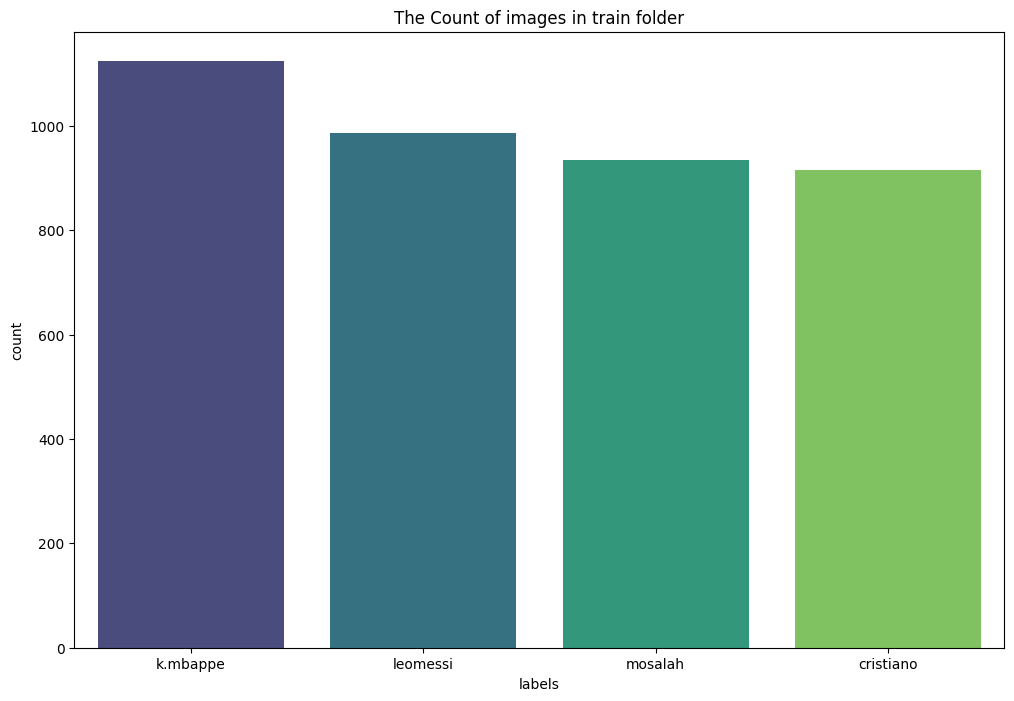

In [4]:
plt.figure(figsize=(12,8))
sns.barplot(x=count.index,y=count.values,palette='viridis')
plt.title('The Count of images in train folder')
plt.xlabel('labels')
plt.ylabel('count')
plt.show()

## **Split Data**

In [5]:
train_df , dummy_df=train_test_split(df,test_size=0.3,shuffle=True,random_state=42)
valid_df,test_df=train_test_split(dummy_df,test_size=0.4,shuffle=True,random_state=42)

In [6]:
train_df

filepaths     labels
3190  /kaggle/input/player-images-scrap-from-instgra...   leomessi
2269  /kaggle/input/player-images-scrap-from-instgra...  cristiano
111   /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
2325  /kaggle/input/player-images-scrap-from-instgra...  cristiano
1089  /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
...                                                 ...        ...
1130  /kaggle/input/player-images-scrap-from-instgra...    mosalah
1294  /kaggle/input/player-images-scrap-from-instgra...    mosalah
860   /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
3507  /kaggle/input/player-images-scrap-from-instgra...   leomessi
3174  /kaggle/input/player-images-scrap-from-instgra...   leomessi

[2772 rows x 2 columns]

In [7]:
test_df

filepaths    labels
511   /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
1258  /kaggle/input/player-images-scrap-from-instgra...   mosalah
612   /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
755   /kaggle/input/player-images-scrap-from-instgra...  k.mbappe
1907  /kaggle/input/player-images-scrap-from-instgra...   mosalah
...                                                 ...       ...
1725  /kaggle/input/player-images-scrap-from-instgra...   mosalah
3599  /kaggle/input/player-images-scrap-from-instgra...  leomessi
1292  /kaggle/input/player-images-scrap-from-instgra...   mosalah
1918  /kaggle/input/player-images-scrap-from-instgra...   mosalah
1056  /kaggle/input/player-images-scrap-from-instgra...  k.mbappe

[476 rows x 2 columns]

In [8]:
valid_df

filepaths     labels
3195  /kaggle/input/player-images-scrap-from-instgra...   leomessi
3729  /kaggle/input/player-images-scrap-from-instgra...   leomessi
443   /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
1953  /kaggle/input/player-images-scrap-from-instgra...    mosalah
2685  /kaggle/input/player-images-scrap-from-instgra...  cristiano
...                                                 ...        ...
3757  /kaggle/input/player-images-scrap-from-instgra...   leomessi
48    /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
1211  /kaggle/input/player-images-scrap-from-instgra...    mosalah
433   /kaggle/input/player-images-scrap-from-instgra...   k.mbappe
2226  /kaggle/input/player-images-scrap-from-instgra...  cristiano

[712 rows x 2 columns]

## **Image Generator**

In [9]:
batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                        color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 2772 validated image filenames belonging to 4 classes.
Found 712 validated image filenames belonging to 4 classes.
Found 476 validated image filenames belonging to 4 classes.


## **Sample of Data**

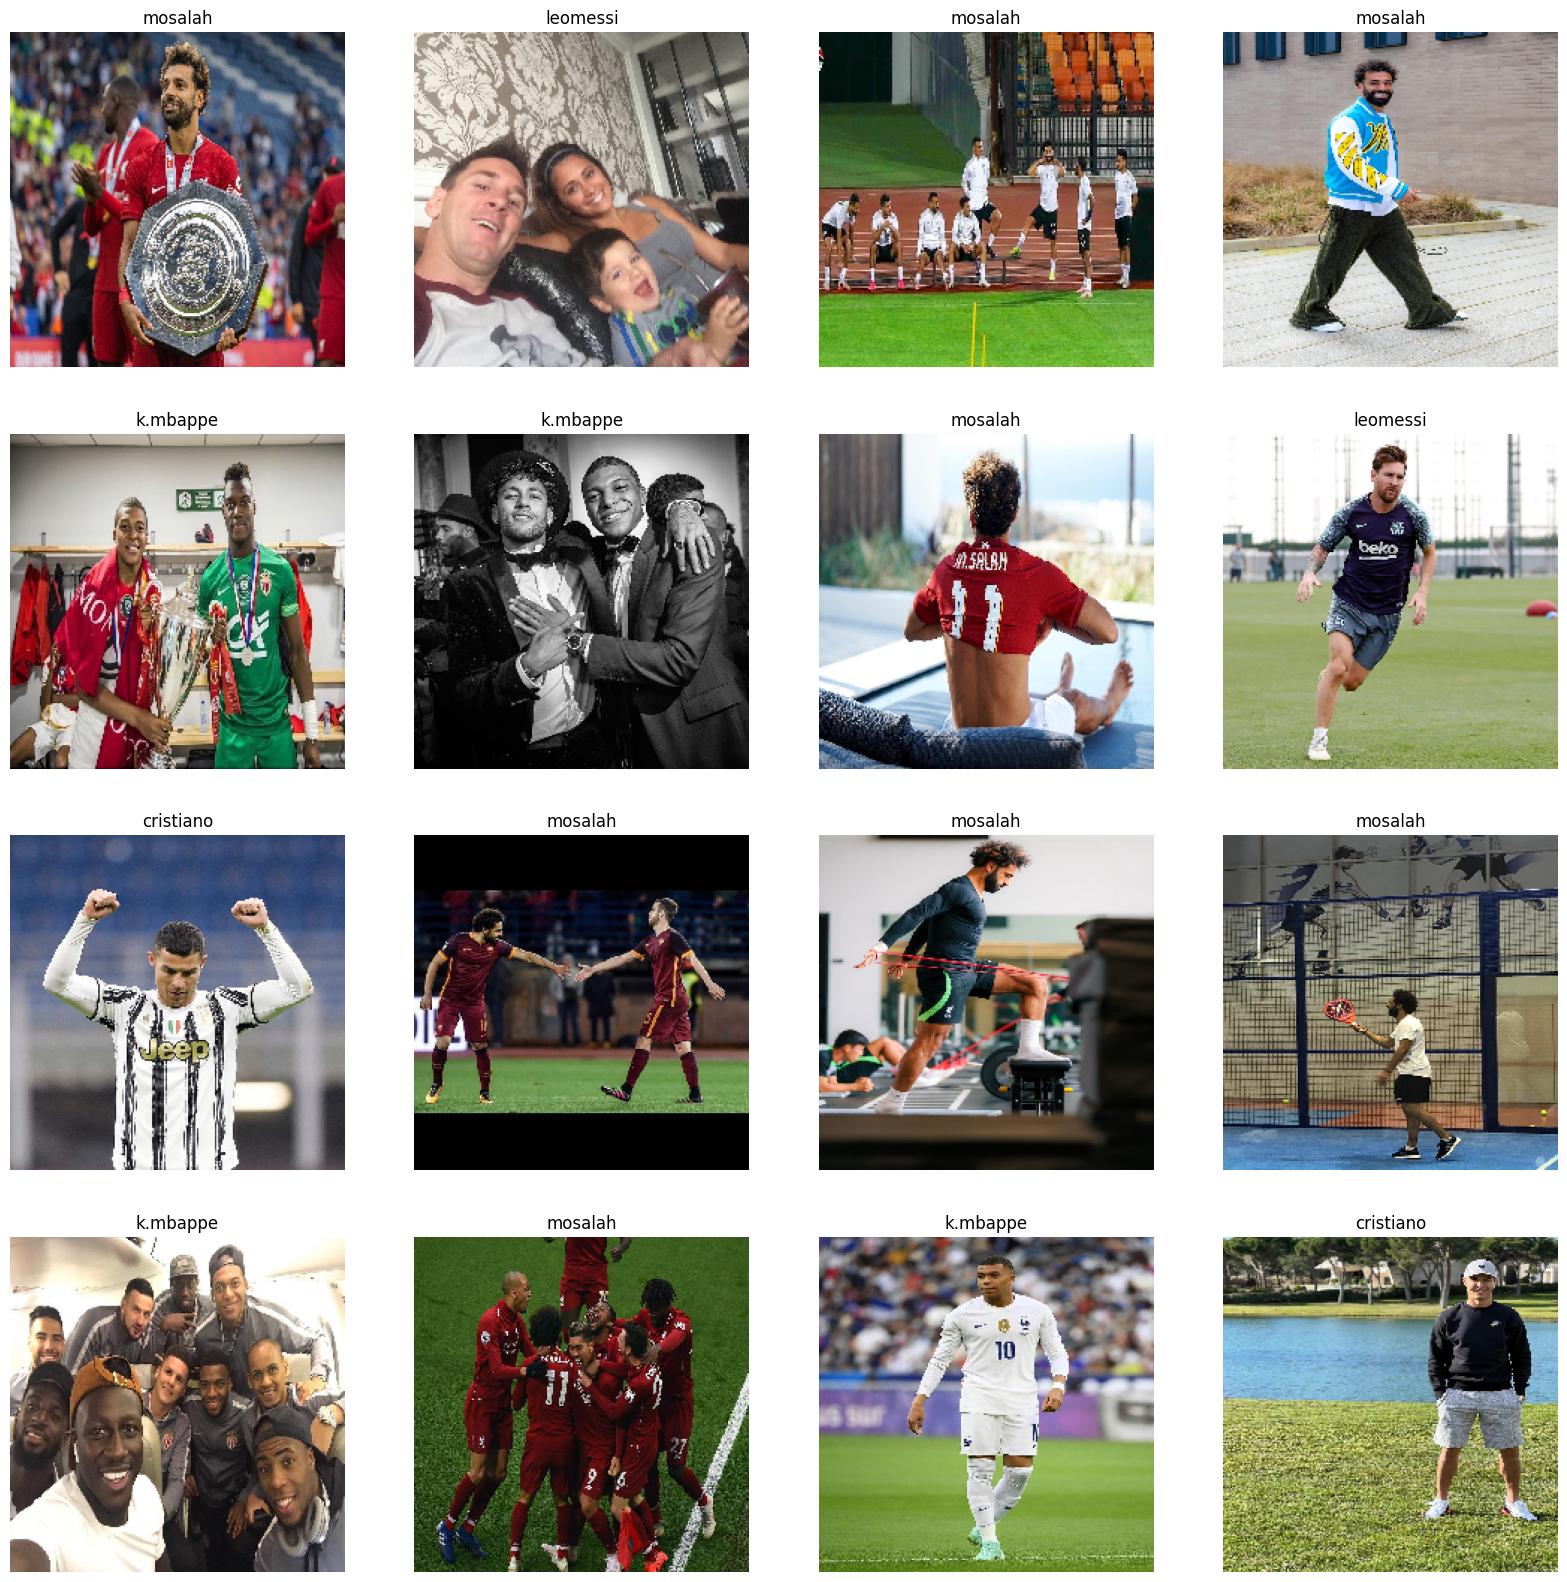

In [10]:
g_dict = train_gen.class_indices      
classes = list(g_dict.keys())       
images, labels = next(train_gen)      

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255      
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]
    plt.title(class_name, color= 'black', fontsize= 12)
    plt.axis('off')
plt.show()

## **Bulid Model**

In [11]:
base_model=keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))
model=Sequential([
    base_model,
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dropout(0.25),
    Dense(4,activation='softmax')
])
model.compile(Adamax(learning_rate= 0.0001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
history=model.fit(train_gen,epochs=10,validation_data=valid_gen,shuffle=False,validation_steps=None)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/174 ━━━━━━━━━━━━━━━━━━━━ 5:22:01 112s/step - accuracy: 0.1250 - loss: 2.3013

I0000 00:00:1724119583.532189      71 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1724119583.650048      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 741ms/step - accuracy: 0.3003 - loss: 1.5077

W0000 00:00:1724119720.382197      70 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


174/174 ━━━━━━━━━━━━━━━━━━━━ 272s 925ms/step - accuracy: 0.3006 - loss: 1.5071 - val_accuracy: 0.4831 - val_loss: 1.2001
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 71s 407ms/step - accuracy: 0.5351 - loss: 1.0801 - val_accuracy: 0.5815 - val_loss: 0.9999
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 71s 407ms/step - accuracy: 0.6812 - loss: 0.8171 - val_accuracy: 0.6250 - val_loss: 0.8960
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 70s 404ms/step - accuracy: 0.7870 - loss: 0.5998 - val_accuracy: 0.6601 - val_loss: 0.8215
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 70s 403ms/step - accuracy: 0.8424 - loss: 0.4513 - val_accuracy: 0.6882 - val_loss: 0.7770
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 71s 408ms/step - accuracy: 0.8732 - loss: 0.3578 - val_accuracy: 0.6910 - val_loss: 0.7740
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 72s 411ms/step - accuracy: 0.9178 - loss: 0.2718 - val_accuracy: 0.7065 - val_loss: 0.7517
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 70s 404ms/step - accuracy: 0.9293 - loss: 0.2270 - va

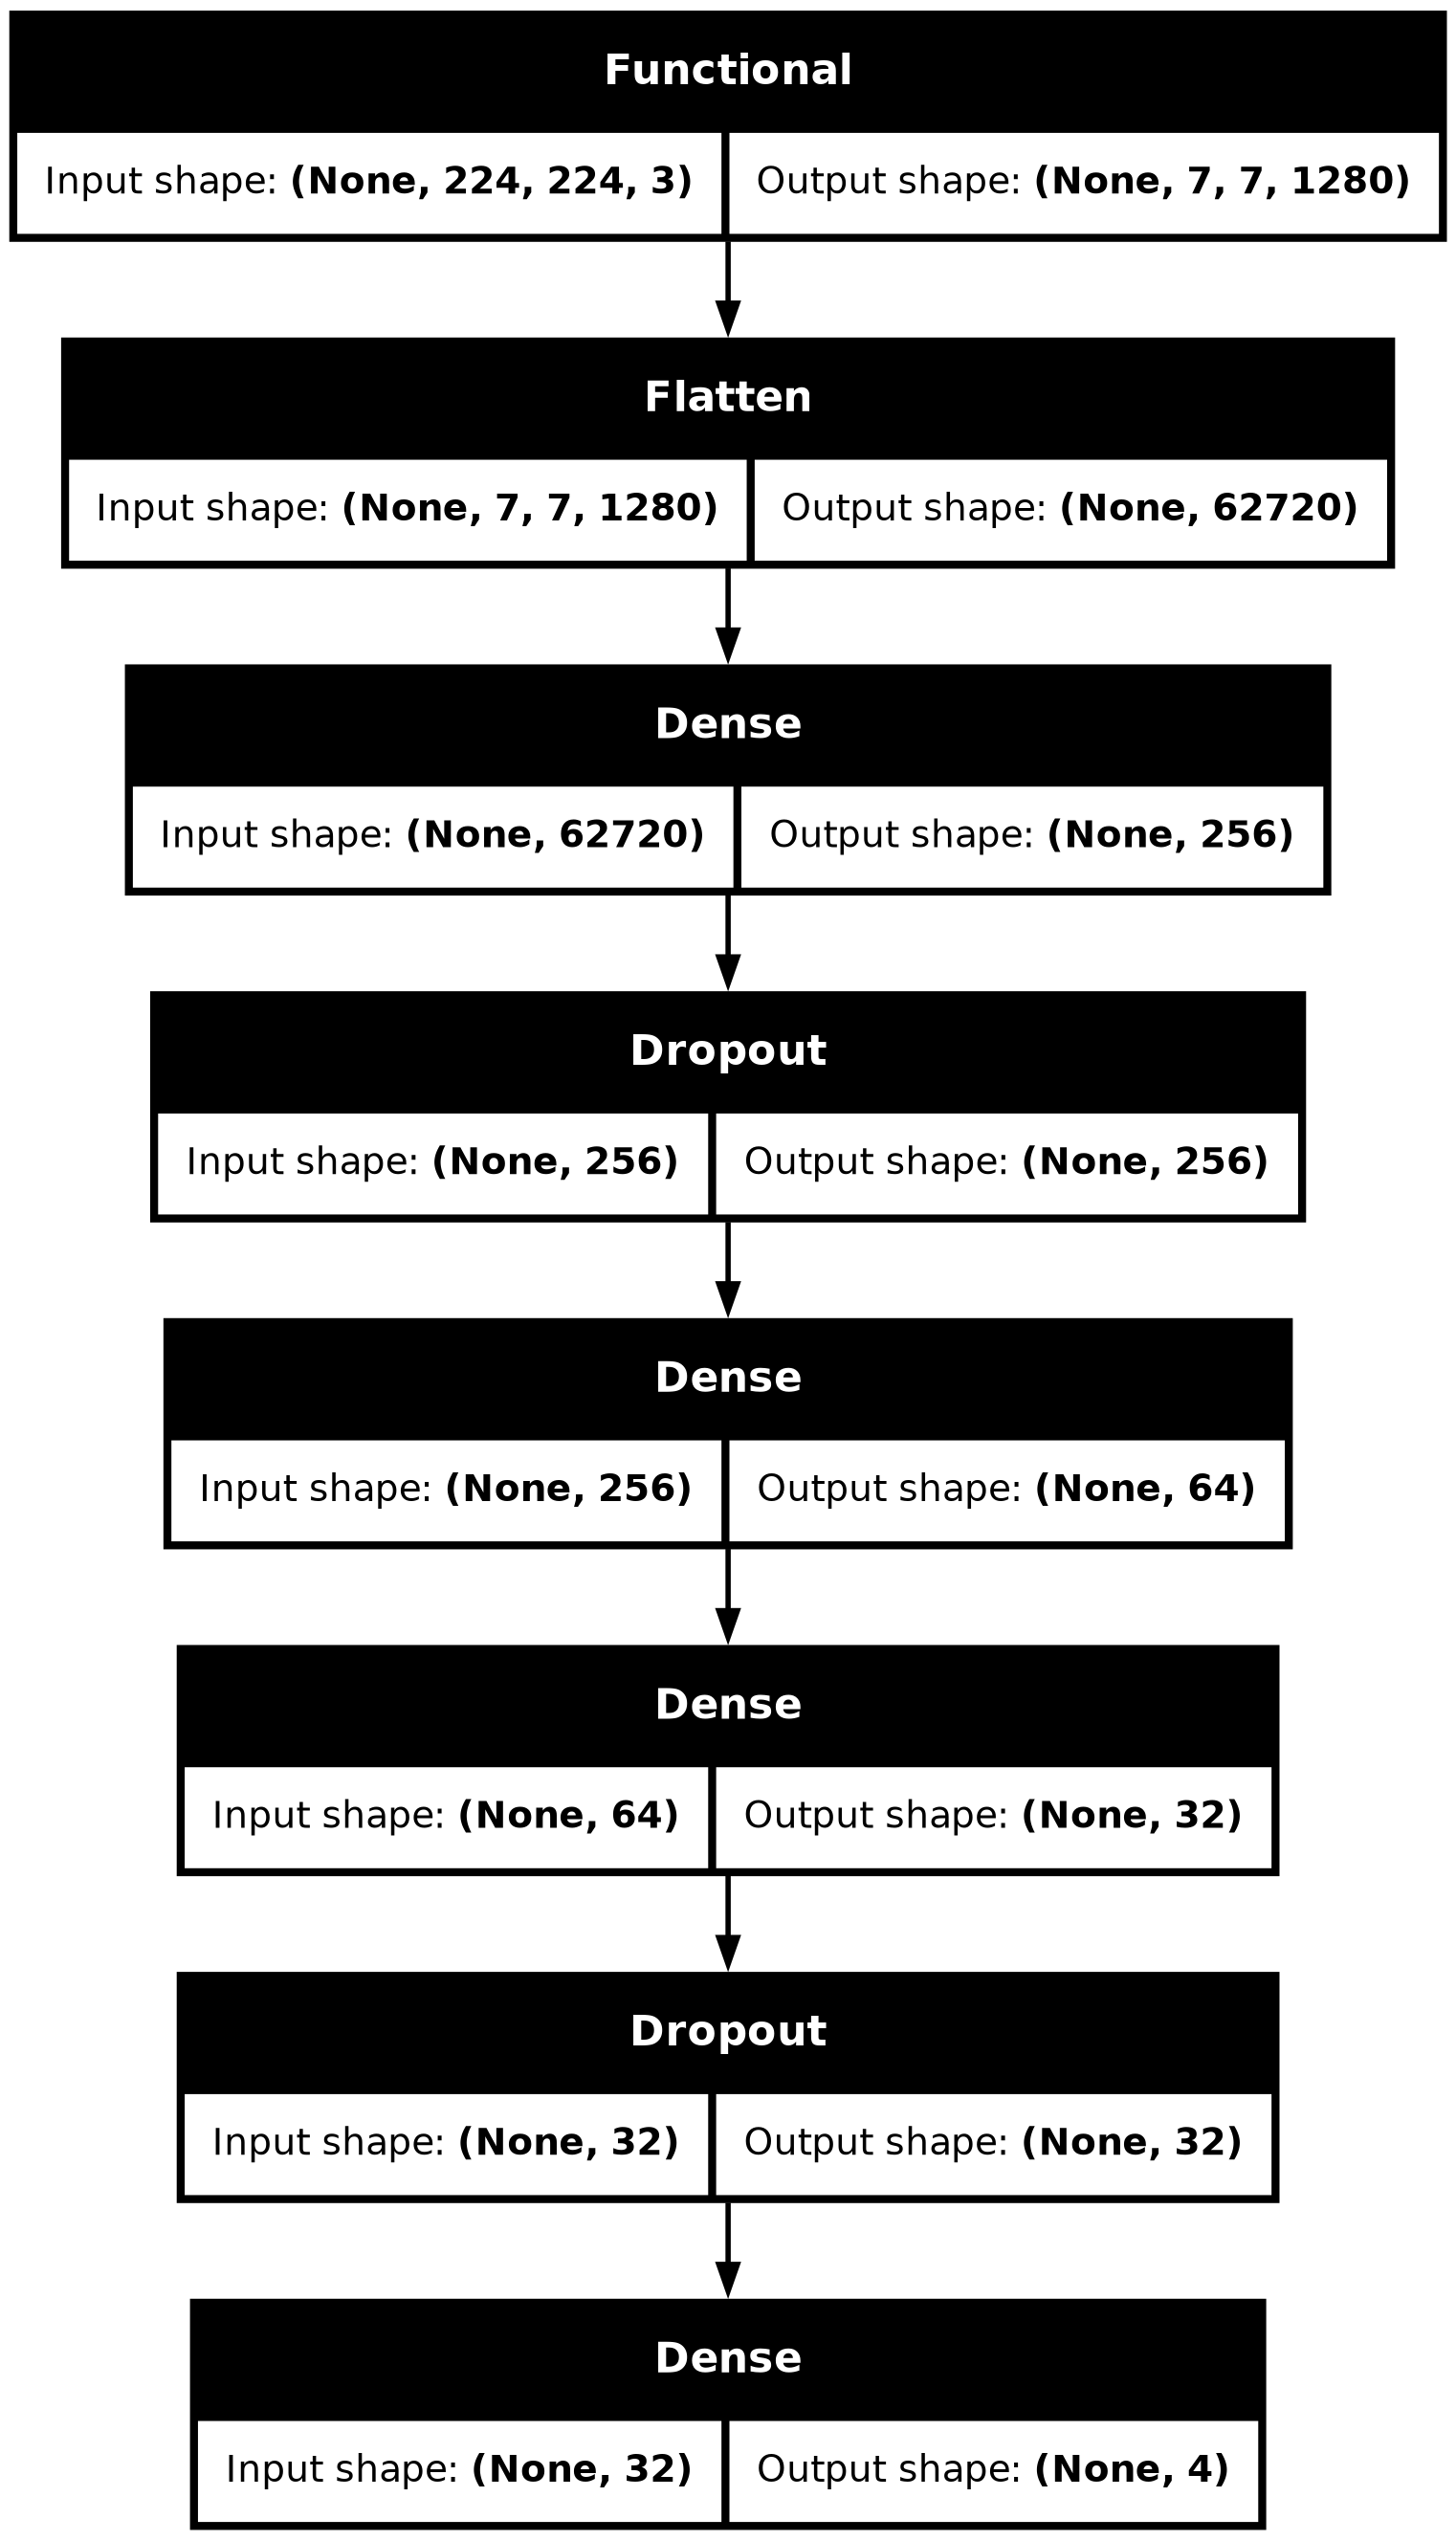

In [13]:
tf.keras.utils.plot_model(model,show_shapes=True)

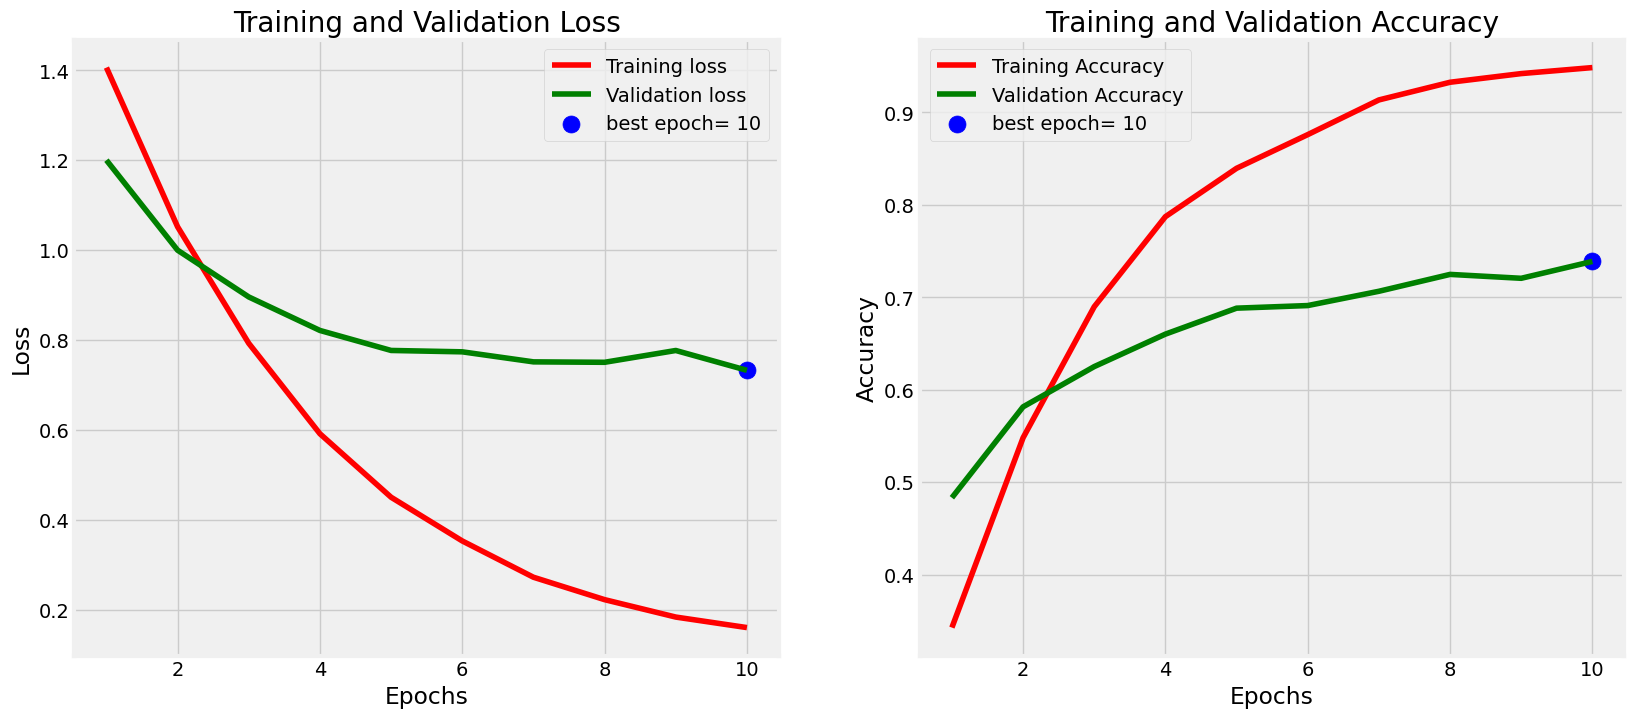

In [14]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [15]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Valid Loss: ", valid_score[0])
print("Valid Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 1.0000 - loss: 0.0227
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step - accuracy: 0.8048 - loss: 0.5146


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 412ms/step - accuracy: 0.7864 - loss: 0.5966
Train Loss:  0.028105122968554497
Train Accuracy:  1.0
--------------------
Valid Loss:  0.5519806146621704
Valid Accuracy:  0.7946428656578064
--------------------
Test Loss:  0.6742043495178223
Test Accuracy:  0.7678571343421936


In [16]:
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)

 1/30 ━━━━━━━━━━━━━━━━━━━━ 3:35 7s/step

W0000 00:00:1724120401.655712      71 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


30/30 ━━━━━━━━━━━━━━━━━━━━ 28s 698ms/step


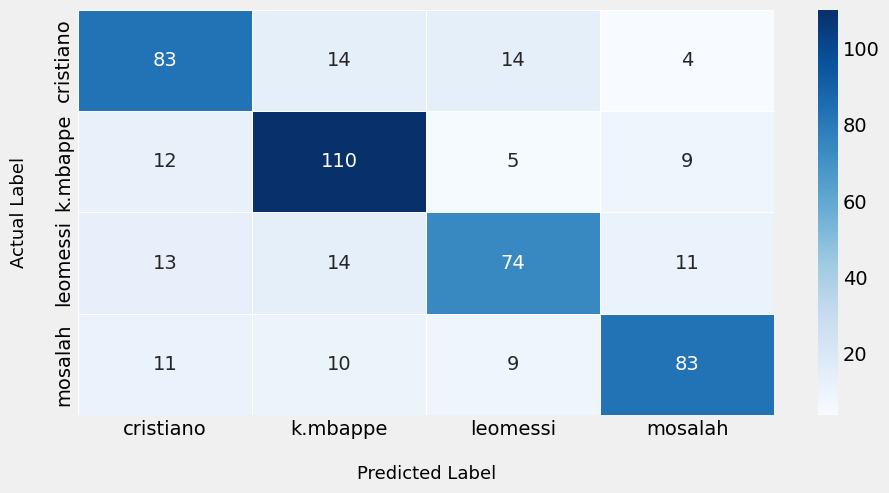

In [17]:
plt.figure(figsize=(10,5))
cm=confusion_matrix(test_gen.classes,y_pred)
labels = list(test_gen.class_indices.keys())
sns.heatmap(cm,annot=True,fmt="d",xticklabels=labels,yticklabels=labels,cmap="Blues", linewidths=.5)
plt.xlabel('\nPredicted Label',fontsize=13)
plt.ylabel('Actual Label\n',fontsize=13);